In [2]:
%matplotlib inline
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 35
We consider two models for classification: (1) “flexible” (e.g. kNN) (2) “rigid ” (e.g. linear). Discuss which would you typically choose in those situations:
* A small number of training samples N

Rigid: the fewer data, the more unstable a flexible classification becomes. 
* A large number of features

Rigid: more features imply more dimensions in the vector defining the data, and flexible method (k-NN) undergoes the curse of dimensionality for high dimensions.
* A large number of training samples N

Flexible.
* Highly non-linear behavior

Flexible: rigid method would require too many additional parameters, increasing the model complexity.

### 37
We want to check if the coin is fair, we obtained the following result: X = {H,T,H,H,T,T,H,H,H}.
* define the PMF
* define the likelihood function
* calculate the maximum value estimator of frequency of heads

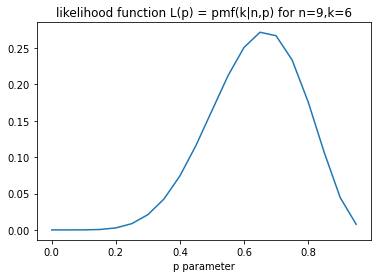

In [4]:
def combCoef(n,k):
    a = math.factorial(n)
    b = math.factorial(k)
    c = math.factorial(n-k)
    return a/(b*c)

def binomial_pmf(n,k,p):
    return combCoef(n,k) * p**k * (1-p)**(n-k)

def total_binomial_likelihood(n,k):
    ps= list(np.arange(0,1.,0.05))
    return (ps, [binomial_pmf(n,k,p) for p in ps])

n = 9
k = 6
total_binomial_likelihood(n,k)
ps,values2 = total_binomial_likelihood(n,k)
plt.title('likelihood function L(p) = pmf(k|n,p) for' + format(' n=%d,k=%d'%(n,k)))
plt.xlabel('p parameter')
plt.plot(ps,values2)

In [5]:
print ('likelihood normalization can be different than one 1 = ' +format('%f'%float(sum(values2)*0.05)))

likelihood normalization can be different than one 1 = 0.100004


We calculate the maximum value estimator as
$$p_\text{MLE} = argmax L(p) = 0.67$$
which means that this coin is not fair.

### 38
When MAP and MLE give the same results?

$$\theta_{MAP} = \text{argmax}f(\theta|x) = argmax \log(f(x|\theta)) + \log(f(\theta))$$

with $f(x|\theta)$ the likelihood function and $f(\theta)$ the priori distribution, whereas 

$$\theta_{MLE} = \text{argmax}f(x|\theta)=\text{argmax}\log(f(x|\theta))$$. MAP and MLE are equivalent when $f(\theta)$ is uniform, which drops out of the derivative when looking for $\theta_\text{max}$.

### 39
We want to check if the coin is fair, we estimate the frequency of heads. Calculate the MAP maximum value estimator, when the prior distribution is described by the beta function
$$\text{pdf}(p|\alpha, \beta) = \frac{(\alpha-1)! ( \beta-1)!}{(\alpha+ \beta -1)!} p^{\alpha-1} (1-p)^{\beta-1}$$

Start with likelihood function for ex 37

$$ f(x|p) = p^{\sum_{i=1}^n x^i}(1-p)^{n-\sum_{i=1}^n x^i}$$

and we take the beta function as the prior distribution. We maximize the logarithm as in

$$\frac{\partial \log(f(p|x))}{\partial p} = \frac{1}{p}\sum_{i=1}^n x^i - \frac{n-\sum_{i=1}^n x^i}{1-p} + \frac{\alpha - 1}{p} - \frac{\beta - 1}{1-p} = 0 
$$
since $\log\left[\frac{(\alpha-1)! ( \beta-1)!}{(\alpha+ \beta -1)!}\right]$ is constant in $p$.

We get 

$$\frac{\alpha - 1 + \sum_{i=1}^n x^i}{p} - \frac{n-\sum_{i=1}^n x^i + \beta - 1}{1-p} = 0$$

which implies

$$p_\text{max} = \frac{\sum_{i=1}^n x^i + \alpha - 1}{\alpha + \beta + n - 2} \ . $$

### 40
Consider the case of $\lambda >> 1$, and $\lambda \approx 0$: how does it affect the overfitting/bias problem? Will the procedure work correctly anyway?

$$ E_T[L(f_\theta(x),Y)]=\frac{1}{2N} \sum (\theta^T x^{(i)}-y^{(i)})^2 + \frac{\lambda}{2}\sum \theta_j^2 $$

### 41
Read the code and try to understand how it works. By changing the values of degree and alpha observe the interplay of overfitting/bias
* for which values one can obtained the reasonable fit to data ?
* plot the training and test errors as a function of polynomial degree (for fixed alpha)
* plot the training and test errors as a function of regularization term (for fixed degree). 

### 42
We consider a linear regression model. Let’s assume that the error model is additive $y= f(x) + \epsilon$ , and errors are have Gaussian distribution with 0 mean ($E[\epsilon] =0$) and variance
($\text{Var}[\epsilon] =\sigma^2$). We In addition, assume that our parameters are described by:
* Gaussian Distribution, with 0 mean, and some variance
* Laplace Distribution, with 0 mean, and some variance

Derive the minimization problem starting from the MAP approach, taking into account the prior distribution of the parameters.

### 43 
We consider a classification model with some regularization scheme. Which statements are true? Justify your choice.
* Adding regularization would typically lower the training error

False.

* Adding new features to your model would make the training error higher or the same

False/True.

* Adding regularization would typically lower the test error

True.

* Adding regularization can cause overfitting of your model

False.

* Using a large value of the lambda parameter can cause the overfitting of your model

False.

* Adding regularization can introduce the bias to your model

True.
* Adding regularization can make the training error higher

True.

### 44
Calculate the derivative of the sigmoid function and express it using the sigmoid.


The sigmoid function is

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

and its derivative is 

$$ -\frac{-e^{-x}}{(1 + e^{-x})^2} = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma^2 \left(\frac{1}{\sigma}-1\right) = \sigma(1-\sigma)$$

### 45 
Assuming the loss function definition as:
$$ L(f_\theta(x),Y)= -log f_\theta(x) \text{ for $Y=1$}\\
                   L(f_\theta(x),Y)= -log (1-f_\theta(x)) \text{ for $Y=0$}$$
what are the loss values for:
* $f_\theta(x)=0$, Y=0
* $f_\theta(x)=1$, Y=0
* $f_\theta(x)=0$, Y=1
* $f_\theta(x)=1$, Y=1

Draw L as a function of $f_\theta(x)$ for Y= 0 and Y=1.

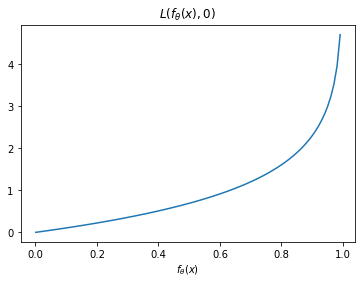

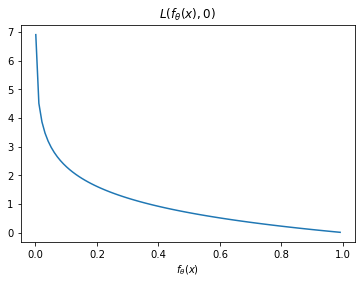

In [16]:
from scipy.stats import uniform

def Loss_func(y):
    fs= list(np.arange(0.001,1,0.01))
    if y == 0:
        return (fs, [-np.log(1-f) for f in fs])
    else:
        return (fs, [-np.log(f) for f in fs])

y=0 #Y=0
fs, L0 = Loss_func(y)
plt.title(r'$L(f_{\theta}(x),0)$')
plt.xlabel(r'$f_{\theta}(x)$')
plt.plot(fs,L0)
plt.show()

y=1 #Y=0
fs, L0 = Loss_func(y)
plt.title(r'$L(f_{\theta}(x),0)$')
plt.xlabel(r'$f_{\theta}(x)$')
plt.plot(fs,L0)
plt.show()

### 46
Calculate the equation of the decision boundary for the logistic regression model assuming:

$$ f_\theta(x)\geq 0.5 \to Y=1\\
f_\theta(x)< 0.5 \to Y=0$$

### 47
* For which value of k k-fold cross-validation is equivalent to Leave-one-out method?
* Order the cross-validation methods (k-fold e.g. k=5, leave-one-out and the simple splitting into validation and training sets) in the ascending cost of the computation power
* For which k the k-fold cross-validation requires the most of the computing power?

Justify your answers

* For k = N: leave-one-out method calculates the prediction error for N samples using N-1 of them, for N total times (one for each total samples). k-fold validation divides the total number of samples in k parts, and calculates the prediction error for each k. For k = N they both calculate over N samples.

* Splitting, k-fold for k = 5, leave-one-out: they are more demanding in terms of computing power the more parts the number of samples is divided into. Unless k = N, the number of parts are, respectively, 2, 5, N-1.

* k = N, since it is equivalent to leave-one-out method (the most demanding in terms of computing power).

### 48
We consider two cases of binary classifier tests:
* A - airplanes security checks before the take-off (Y=’allowed’/’denied’)
* B - decision if according to her/his profile a client will be potentially interested to buy a new product and if to show her/him the targeted advertisement(Y=’yes’/’no’)

How would we decide how to tune our classifier threshold for each case in the context of sensitivity vs specificity trade-off? Justify your answer.

Sensitivity measures the proportion of correctly denied cases (A) or correctly identified interested clients (B).
Specificity measures the proportion of correctly allowed cases (A) or correctly identified uninterested clients (B).

A) High sensitivity: it would be safer to have falsely-denied cases than falsely allowed ones.

B) High specificity: for a successful marketing strategy it would be more useful to correctly identify true uninterested clients (true negatives) than to identify true interested clients at the risk of losing the incorrectly identified as uninterested (false positives).